In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/pisa.csv', names=['Lesen', 'Mathe', 'Naturwissenschaft'])
data.describe()

,Lesen,Mathe,Naturwissenschaft
count,31.000000,31.000000,31.000000
mean,493.451613,493.161290,492.612903
std,33.307495,46.828123,37.669331
min,396.000000,334.000000,375.000000
25%,479.500000,473.000000,477.000000
50%,497.000000,503.000000,496.000000
75%,519.000000,524.500000,516.000000
max,546.000000,557.000000,552.000000


In [10]:
n = data.shape[0]
c = np.identity(n) - 1/n * np.ones((n, n))
x = np.dot(c, data.values)
x

array([[  34.5483871 ,   39.83870968,   35.38709677],
       [  13.5483871 ,   26.83870968,    3.38709677],
       [ -97.4516129 , -159.16129032, -117.61290323],
       [   3.5483871 ,   20.83870968,  -11.61290323],
       [  -9.4516129 ,   -3.16129032,   -5.61290323],
       [  52.5483871 ,   42.83870968,   45.38709677],
       [  11.5483871 ,   23.83870968,    7.38709677],
       [ -19.4516129 ,  -46.16129032,  -31.61290323],
       [  29.5483871 ,   35.83870968,   39.38709677],
       [  33.5483871 ,    9.83870968,   20.38709677],
       [  13.5483871 ,   20.83870968,    3.38709677],
       [  -6.4516129 ,  -36.16129032,  -14.61290323],
       [  28.5483871 ,   63.83870968,   57.38709677],
       [  40.5483871 ,   39.83870968,   36.38709677],
       [  31.5483871 ,   53.83870968,   59.38709677],
       [ -35.4516129 ,  -30.16129032,  -32.61290323],
       [ -10.4516129 ,   20.83870968,  -16.61290323],
       [ -52.4516129 ,  -47.16129032,  -49.61290323],
       [ -71.4516129 , -106.

In [11]:
cov = 1/(n-1) * np.dot(x.T, x)
cov

array([[1109.38924731, 1428.32473118, 1195.61397849],
       [1428.32473118, 2192.87311828, 1644.0311828 ],
       [1195.61397849, 1644.0311828 , 1418.97849462]])

In [12]:
std = np.sqrt(np.diag(cov))
x_std = np.dot(x, np.diag(1/std))
corr = 1/(n-1) * np.dot(x_std.T, x_std)
corr

array([[1.        , 0.91575274, 0.95293022],
       [0.91575274, 1.        , 0.93199888],
       [0.95293022, 0.93199888, 1.        ]])

In [57]:
l, v = np.linalg.eig(corr)
a = np.sqrt(l*n)
a

array([9.42779539, 1.17960443, 1.65082027])

In [55]:
l / l.sum()

array([0.95573469, 0.01496201, 0.02930331])

In [17]:
v

array([[-0.5776974 , -0.59936162,  0.55410411],
       [-0.57332755, -0.18524162, -0.79811094],
       [-0.58100021,  0.77874976,  0.23661692]])

In [42]:
f = np.dot(x, v)
f

array([[-63.35905356,  -0.52907121,  -4.27912063],
       [-25.18214347, -10.45432856, -13.11160628],
       [215.88221639,  -3.69896831,  45.20082391],
       [ -7.25020111, -15.03050908, -17.41323559],
       [ 10.53372495,   1.87948949,  -4.04222508],
       [-81.28759145,  -4.08580756,   5.66658979],
       [-24.63076686,  -5.5848814 , -10.87901401],
       [ 56.06978879,  -4.40899834,  18.5834641 ],
       [-60.50125721,   6.32370242,  -2.91072977],
       [-36.86652668,  -6.05370731,  15.56084952],
       [-21.7421782 ,  -9.34287881,  -8.32294066],
       [ 32.94944363,  -0.81436963,  21.82819585],
       [-86.43473481,  15.75379429, -21.55283551],
       [-67.40623816,  -3.34649115,  -0.71787903],
       [-83.59655196,  17.36562521, -11.43617997],
       [ 56.72070665,   1.43817178,  -3.28859359],
       [  3.74256351, -10.53319526, -26.35377777],
       [ 86.16513422,   1.53768091,  -3.16296524],
       [143.16871436,   7.50106243,  28.4286465 ],
       [-66.23006114,  -1.86939

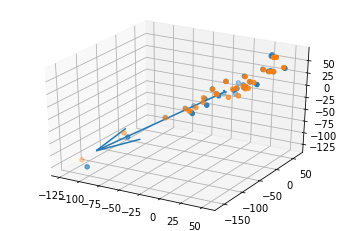

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:, 0], x[:, 1], x[:, 2])

x_re = np.dot(f[:, :2], v[:, :2].T)
ax.scatter3D(x_re[:, 0], x_re[:, 1], x_re[:, 2])

t = np.trace(cov)
for i in range(3):
    ax.quiver(0, 0, 0, *v[:, i], length=l[i]*200 / l.sum())